Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
#!pip install kaggle

In [2]:
import shutil
import os

# Set the path to your downloaded kaggle.json file
kaggle_json_path = "C:\\Users\\Prath\\Downloads\\kaggle.json"

# Set the destination directory
destination_dir = os.path.expanduser("~/.kaggle")

# Create the destination directory if it does not exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the kaggle.json file to the destination directory
shutil.copy(kaggle_json_path, destination_dir)

# Set the permissions of the kaggle.json file
os.chmod(os.path.join(destination_dir, "kaggle.json"), 0o600)


In [3]:
# configuring the path of Kaggle.json file
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json


Importing the Dog vs Cat Dataset from Kaggle

In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [8]:
file_names = os.listdir('train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

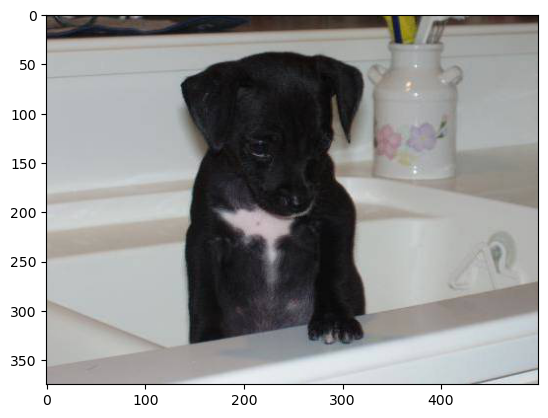

In [10]:
img = mpimg.imread('train/dog.8298.jpg')
plt.imshow(img)
plt.show()

In [11]:
# display dog image
#img = mpimg.imread('/content/train/dog.8298.jpg')
#imgplt = plt.imshow(img)
#plt.show()

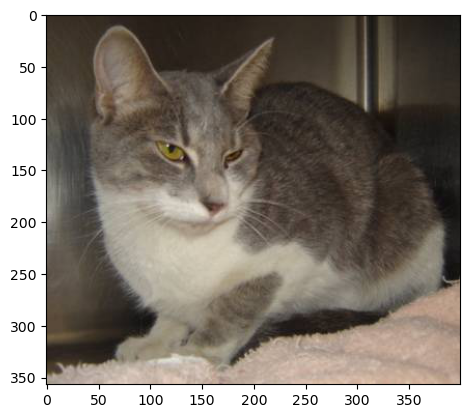

In [12]:
# display cat image
img = mpimg.imread('train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
file_names = os.listdir('train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
cat
cat
cat
cat


In [14]:
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [15]:
#creating a directory for resized images
#os.mkdir('image resized')

In [16]:
#original_folder = 'train'
#resized_folder = 'image resized'

#for i in range(2000):

 # filename = os.listdir(original_folder)[i]
  #img_path = original_folder+filename

  #img = Image.open(img_path)
  #img = img.resize((224, 224))
  #img = img.convert('RGB')

  #newImgPath = resized_folder+filename
  #img.save(newImgPath)

In [17]:
import os
from PIL import Image

original_folder = 'train'
resized_folder = 'image resized'

# Create the 'image_resized' folder if it doesn't exist
if not os.path.exists(resized_folder):
    os.mkdir(resized_folder)

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    new_img_path = os.path.join(resized_folder, filename)
    img.save(new_img_path)


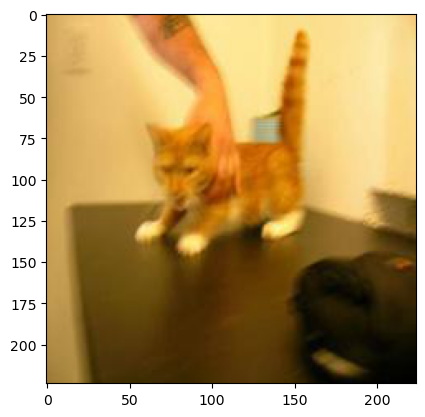

In [18]:
# display resized dog image
img = mpimg.imread('image resized/cat.0.jpg')
imgplt = plt.imshow(img)
plt.show()

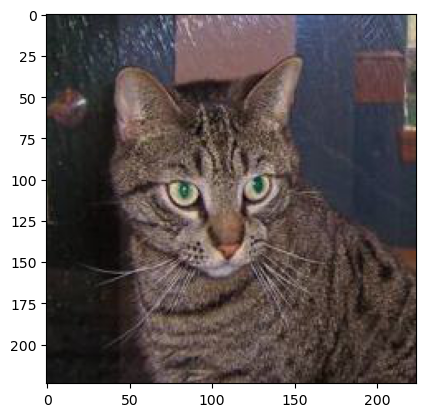

In [19]:
# display resized cat image
img = mpimg.imread('image resized/cat.1.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [20]:
# creaing a for loop to assign labels
filenames = os.listdir('image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
2000


In [22]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [23]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0]
[2000]


Converting all the resized images to numpy arrays

In [24]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [25]:
import cv2
import glob

In [26]:
image_directory = 'image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [169 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [167 196 200]
   [164 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [165 194 198]
   [168 200

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [33]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled)

[[[[0.45098039 0.4627451  0.49411765]
   [0.44705882 0.45882353 0.49019608]
   [0.48235294 0.47843137 0.51372549]
   ...
   [0.98431373 0.99215686 0.99215686]
   [0.98823529 0.98431373 1.        ]
   [0.98431373 0.98039216 0.99607843]]

  [[0.24313725 0.25490196 0.28627451]
   [0.24313725 0.25098039 0.28235294]
   [0.2745098  0.27058824 0.30588235]
   ...
   [0.98431373 0.99215686 0.99215686]
   [0.99215686 0.98823529 1.        ]
   [0.98823529 0.98431373 1.        ]]

  [[0.22745098 0.23529412 0.26666667]
   [0.22352941 0.23137255 0.2627451 ]
   [0.25882353 0.25490196 0.29019608]
   ...
   [0.98823529 0.99607843 0.99607843]
   [1.         0.99607843 1.        ]
   [0.99607843 0.99215686 1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.98823529 0.99607843 0.99607843]
   [0.99215686 1.         1.        ]
   [0.99215686 1.         1.        ]]

  [[0.99215686 0.99215686 0.99215686]
   [0.9

**Building the Neural Network**

In [35]:
#pip install tensorflow-hub


In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [38]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [40]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5



50/50 [==============================] - 45s 426ms/step - loss: 0.0339 - acc: 0.9856
Epoch 2/5
50/50 [==============================] - 21s 427ms/step - loss: 2.0037e-04 - acc: 1.0000
Epoch 3/5
50/50 [==============================] - 21s 421ms/step - loss: 1.8033e-04 - acc: 1.0000
Epoch 4/5
50/50 [==============================] - 21s 423ms/step - loss: 1.6270e-04 - acc: 1.0000
Epoch 5/5
50/50 [==============================] - 21s 423ms/step - loss: 1.4618e-04 - acc: 1.0000


In [41]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 409ms/step - loss: 1.1311e-04 - acc: 1.0000
Test Loss = 0.00011310551053611562
Test Accuracy = 1.0


In [50]:
Predictive System

SyntaxError: invalid syntax (567470285.py, line 1)

Path of the image to be predicted: image resized/cat.10.jpg


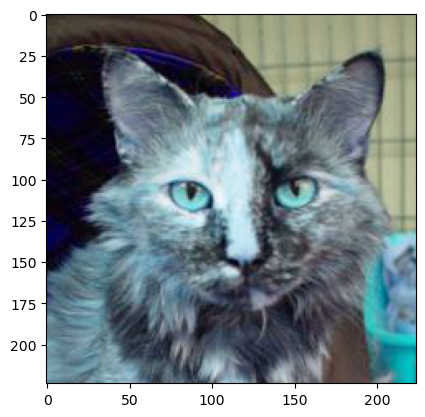

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

input_image_path = input('Path of the image to be predicted: ')

# Load the image
input_image = plt.imread(input_image_path)

# Check if the image is loaded successfully
if input_image is None:
    print("Error: Unable to load the image.")
else:
    # Convert BGR to RGB
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(input_image_rgb)
    plt.show()

    # Continue with the rest of your code
    input_image_resize = cv2.resize(input_image_rgb, (224, 224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 0:
        print('The image represents a Cat')
    else:
        print('The image represents a Dog')
